The owner of Bangalore Pizza restaurant chain wants to predict the sales of his specialty Thin Crust Masala Pizza. He gathered data on monthly sales at his restaurant and potentially relevant variables for 15 outlets across Karnataka.

1) Estimate the MLR model coefficients<br>
2) Is there an evidence of violation of any key assumption of regression analysis?<br>
3) Which variable among these would you choose to remove and Why?<br>
4) Will removing that variable increase the overall explanatory power of the model?

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm

In [2]:
# load data
df = pd.read_csv('C:/Users/Karthik.Iyer/Downloads/AccelerateAI/Regression-Models-main/MLR_Q14_PizzaSales.csv')
df.head()

,Outlet Number,Quantity Sold,Average Price,Monthly Advertising Expenditures,Disposable Income per Household
0,1,"85,300",$10.14,"$64,800","$42,100"
1,2,"40,500",$10.88,"$42,800","$38,300"
2,3,"61,800",$12.33,"$58,600","$41,000"
3,4,"50,800",$12.70,"$46,500","$43,300"
4,5,"60,600",$12.29,"$50,700","$44,000"


In [3]:
# Check shape
df.shape

(15, 5)

There are 15 observations with 5 features

In [4]:
# Check data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 5 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Outlet Number                     15 non-null     int64 
 1   Quantity Sold                     15 non-null     object
 2   Average Price                     15 non-null     object
 3   Monthly Advertising Expenditures  15 non-null     object
 4   Disposable Income per Household   15 non-null     object
dtypes: int64(1), object(4)
memory usage: 728.0+ bytes


Variables with object data types needs to be handled by cleaning data.

In [5]:
# Check missing values
df.isnull().sum()

Outlet Number                       0
Quantity Sold                       0
Average Price                       0
Monthly Advertising Expenditures    0
Disposable Income per Household     0
dtype: int64

No missing values

In [6]:
# Data Cleaning
df['Quantity'] = df['Quantity Sold'].str.replace(",","",regex=True).astype(int)
df['AvPrice'] = df['Average Price'].str.replace("\$|\.","",regex=True).astype(float)
df['AdExpense'] = df['Monthly Advertising Expenditures'].str.replace("\$|,","",regex=True).astype(int)
df['DispIncome'] = df['Disposable Income per Household'].str.replace("\$|,","",regex=True).astype(int)
df.drop(['Outlet Number','Quantity Sold', 'Average Price', 
         'Monthly Advertising Expenditures', 'Disposable Income per Household'], axis=1, inplace=True)

In [7]:
# Check data
df.head()

,Quantity,AvPrice,AdExpense,DispIncome
0,85300,1014.0,64800,42100
1,40500,1088.0,42800,38300
2,61800,1233.0,58600,41000
3,50800,1270.0,46500,43300
4,60600,1229.0,50700,44000


In [8]:
# Creat X and Y
Y = df['Quantity']
X = df.drop('Quantity', axis=1)

In [9]:
# Check for correlation
X.corr()

,AvPrice,AdExpense,DispIncome
AvPrice,1.000000,-0.172954,0.334160
AdExpense,-0.172954,1.000000,0.429599
DispIncome,0.334160,0.429599,1.000000


Don't see variables which are **strongly correlated**

In [10]:
# Lets chech multi-collinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
pd.Series([variance_inflation_factor(X.values, i) for i in range(X.shape[1])], index=X.columns)

AvPrice       176.795369
AdExpense      94.344057
DispIncome    362.798199
dtype: float64

There is **strong multi-collinearity**

We can drop DispIncome - as this is the most difficult variable to get. Then we can drop one of the remaining two if needed.

In [11]:
# Drop DispIncome
X = df.drop(['Quantity', 'DispIncome'], axis=1)

pd.Series([variance_inflation_factor(X.values, i) for i in range(X.shape[1])], index=X.columns)

AvPrice      39.906516
AdExpense    39.906516
dtype: float64

In [12]:
# Lets check correlation with Y
X.corrwith(Y)

AvPrice     -0.350204
AdExpense    0.933994
dtype: float64

In [13]:
# Lets retain AdExpense as this has high correlation
X = df.AdExpense

In [14]:
# Fit an OLS model
X = sm.add_constant(X)
model = sm.OLS(Y,X).fit()
model.summary()

C:\Users\Karthik.Iyer\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Quantity   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     88.84
Date:                Fri, 20 May 2022   Prob (F-statistic):           3.56e-07
Time:                        15:43:15   Log-Likelihood:                -147.61
No. Observations:                  15   AIC:                             299.2
Df Residuals:                      13   BIC:                             300.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.266e+04   1.03e+04     -3.169      0.007   -5.49e+04   -1.04e+04
AdExpense      1.7548      0.186      9.425      0.000       1.353       2.157
==============================================================================
Omnibus:                        1.430   Durbin-Watson:                   1.449
Prob(Omnibus):                  0.489   Jarque-Bera (JB):                0.823
Skew:                          -0.051   Prob(JB):                        0.662
Kurtosis:                       1.857   Cond. No.                     4.52e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.52e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

1) Estimate the MLR model coefficients

**Regression Eqn:**<br>
Quantity = -32660 + 1.7548 * AdExpense

2) Is there an evidence of violation of any key assumption of regression analysis?

**Durbin-Watson = 1.449 (different from 2) indicating non-independence of data**

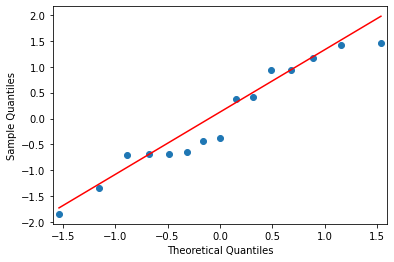

In [15]:
# Residual Analysis
residuals = model.resid

#Q-Q Plot
sm.qqplot(residuals, fit=True, line='q')
plt.show()

**Residuals are not normally distributed !**

**The assumptions of Regression Analysis are violated**

3) Which variable among these would you choose to remove and Why?

Among the multi-collinear variables, it is apt to remove those that are difficult to obtain. Disposable Income of Household for example are difficult to obtain in practice.

Next among the other two, AdExpense has a higher correlation with Y, we will retain it in the dataset

4) Will removing that variable increase the overall explanatory power of the model?

In [16]:
# lets build full model
Y = df['Quantity']
X = df.drop('Quantity', axis=1)

X = sm.add_constant(X)
full_model = sm.OLS(Y,X).fit()
full_model.summary()

C:\Users\Karthik.Iyer\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Quantity   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     69.17
Date:                Fri, 20 May 2022   Prob (F-statistic):           2.00e-07
Time:                        15:43:15   Log-Likelihood:                -140.63
No. Observations:                  15   AIC:                             289.3
Df Residuals:                      11   BIC:                             292.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -3.33e+04   1.79e+04     -1.861      0.090   -7.27e+04    6092.416
AvPrice      -40.4153     10.406     -3.884      0.003     -63.320     -17.511
AdExpense      1.4544      0.152      9.593      0.000       1.121       1.788
DispIncome     1.5279      0.513      2.979      0.013       0.399       2.657
==============================================================================
Omnibus:                        0.919   Durbin-Watson:                   1.542
Prob(Omnibus):                  0.632   Jarque-Bera (JB):                0.815
Skew:                           0.353   Prob(JB):                        0.665
Kurtosis:                       2.103   Cond. No.                     1.44e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.44e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**R-Squared in the full model is 0.95, but in the final model it was 0.87. This indicates that removing the variables has reduced the explanatory power of the model.**